In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
full_data = pd.read_csv('titanic_data.csv')

In [25]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
full_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [27]:
# From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
# Survived: Outcome of survival (0 = No; 1 = Yes)
# Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
# Name: Name of passenger
# Sex: Sex of the passenger
# Age: Age of the passenger (Some entries contain NaN)
# SibSp: Number of siblings and spouses of the passenger aboard
# Parch: Number of parents and children of the passenger aboard
# Ticket: Ticket number of the passenger
# Fare: Fare paid by the passenger
# Cabin Cabin number of the passenger (Some entries contain NaN)
# Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
# Since we're interested in the outcome of survival for each passenger or crew member, we can remove the Survived feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.
# Run the code cell below to remove Survived as a feature of the dataset and store it in outcomes.

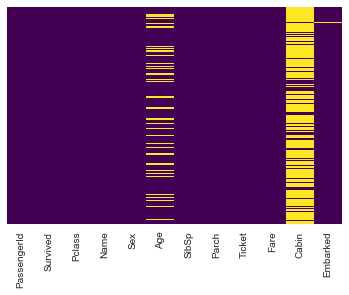

In [28]:
sns.heatmap(full_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

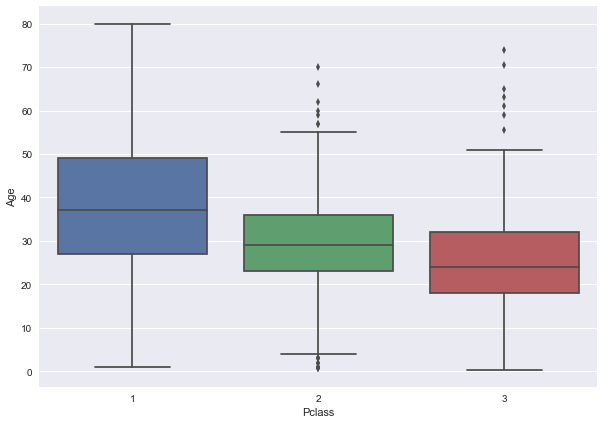

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=full_data)
# wealthier passengers are in the 1 or 2 class

In [30]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age

In [31]:
full_data['Age'] = full_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [32]:
full_data.drop('Cabin', axis=1, inplace=True)

In [33]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
full_data.dropna(inplace=True)

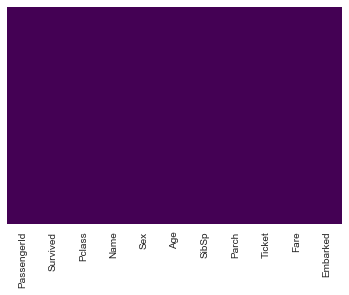

In [36]:
sns.heatmap(full_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [38]:
sex = pd.get_dummies(full_data['Sex'], drop_first=True)
embark = pd.get_dummies(full_data['Embarked'], drop_first=True)

In [39]:
full_data = pd.concat([full_data, sex, embark], axis=1)

In [43]:
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
full_data.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [44]:
X = full_data.drop('Survived', axis=1)
y = full_data['Survived']

In [47]:
X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
prediction = logmodel.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

In [57]:
print accuracy_score(y_test, prediction)

0.80612244898


In [58]:
print classification_report(y_test, prediction)

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       184
          1       0.76      0.71      0.73       110

avg / total       0.80      0.81      0.80       294

